Project: Capstone Project - Inferential Statistics 2 - 6 Hours

At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? Submission: Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt

In [2]:
data = [pd.read_csv('asos_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_df= pd.concat(data)
print(asos_df.head())

data = [pd.read_csv('snotel_df.dat', parse_dates = True, index_col = 'Date_Time')]
snotel_df= pd.concat(data)
print(snotel_df.head())

                     Temperature_degC  Dewpoint_degC  Pressure_hp  \
Date_Time                                                           
2006-01-01 01:00:00              -1.0           -7.0          NaN   
2006-01-01 02:00:00              -3.0           -8.0          NaN   
2006-01-01 03:00:00              -4.0           -8.0          NaN   
2006-01-01 04:00:00              -4.0           -9.0          NaN   
2006-01-01 05:00:00              -5.0           -8.0          NaN   

                     WindDirection_deg  WindSpeed_m/s  CloudCover  \
Date_Time                                                           
2006-01-01 01:00:00              220.0            7.7         NaN   
2006-01-01 02:00:00              230.0            5.1         NaN   
2006-01-01 03:00:00              230.0            3.6         NaN   
2006-01-01 04:00:00              240.0            6.2         NaN   
2006-01-01 05:00:00              210.0            6.2         NaN   

                     1hr_Precipi

## Determining Outliers Statistically (Snow Depth)

-196.0


Text(0,0.5,'Snow Depth (inches)')

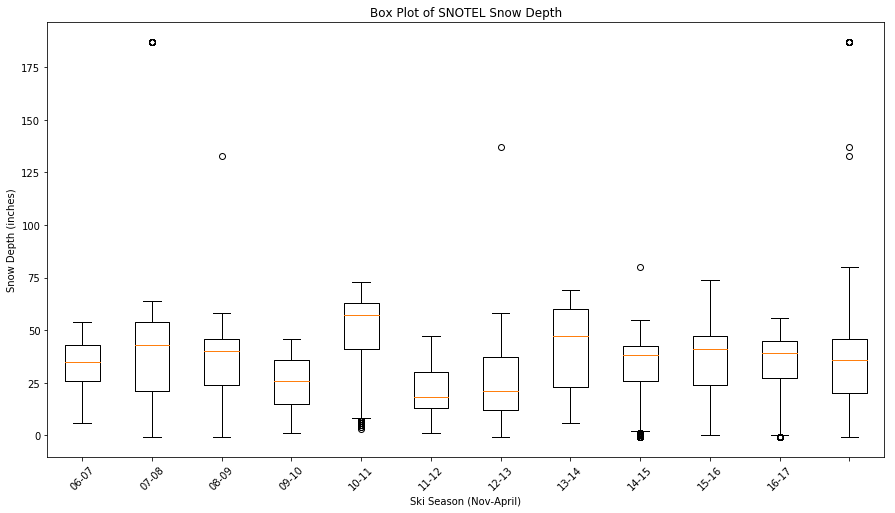

In [3]:

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_df['SNWD.I-1 (in) '][~np.isnan(snotel_df['SNWD.I-1 (in) '])]

merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]
print(filtered_data.min())
plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Snow Depth')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

       TOBS.I-1 (degC)   SNWD.I-1 (in) 
count      95090.000000    82932.000000
mean           1.358249       21.443942
std            9.107234       21.196144
min          -33.100000       -3.000000
25%           -5.000000        0.000000
50%            1.300000       18.000000
75%            7.700000       40.000000
max           25.100000      187.000000


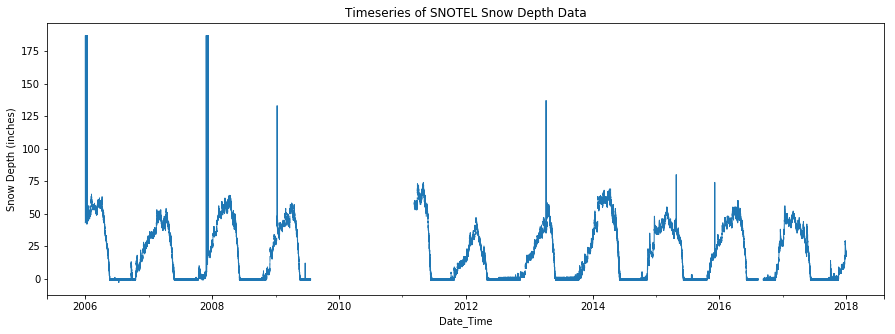

In [4]:
print(snotel_df['2006':'2017'].describe())

#years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

#for j in years:
plt.figure(figsize=(15,5))
    
ax1 = snotel_df['SNWD.I-1 (in) ']['2006':'2017'].plot(use_index=True, linewidth=1)
ax1.set_ylabel("Date")
ax1.set_ylabel("Snow Depth (inches)")
ax1.set_title("Timeseries of SNOTEL Snow Depth Data")
  
#ax2 = snotel_df['TOBS.I-1 (degC) '].plot(use_index=True, secondary_y = True, marker='.', markersize = 0.25)
#ax2.set_ylabel("Observed Temperature (deg C)", rotation = -90)
    
#Create legend
#h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, l1+l2, loc=2)
      
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')

plt.show()

In [5]:
plt.figure(figsize=(15,5))

xx=(snotel_df['SNWD.I-1 (in) ']<-100) | (snotel_df['SNWD.I-1 (in) ']>100) | (snotel_df['SNWD.I-1 (in) ']['2015']>70)
snotel_df['SNWD.I-1 (in) '][xx]=np.NaN
snotel_filled_df = snotel_df.interpolate(limit=3)


<Figure size 1080x360 with 0 Axes>

74.0


Text(0,0.5,'Snow Depth (inches)')

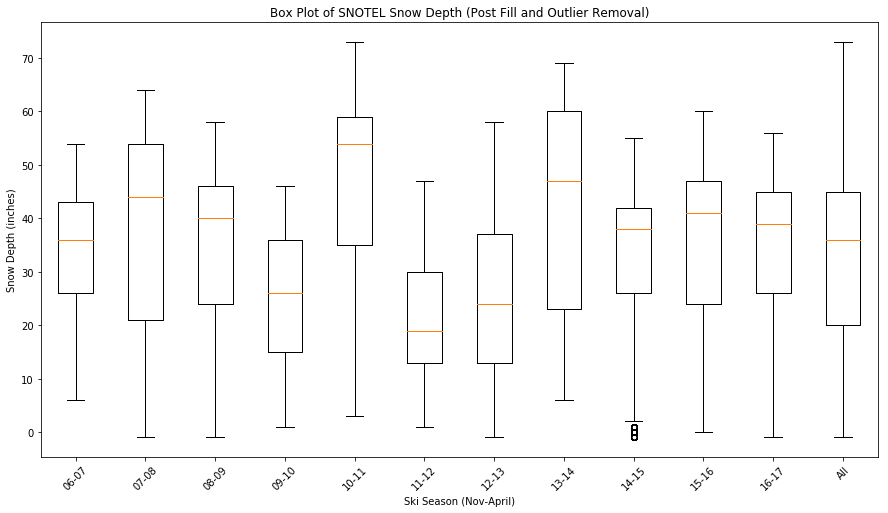

In [6]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_filled_df['SNWD.I-1 (in) '][~np.isnan(snotel_filled_df['SNWD.I-1 (in) '])]


merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]
print(filtered_data.max())
plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Snow Depth (Post Fill and Outlier Removal)')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

Text(0.5,1,'Timeseries of SNOTEL Snow Depth (Post Filled and Outlier Removal)')

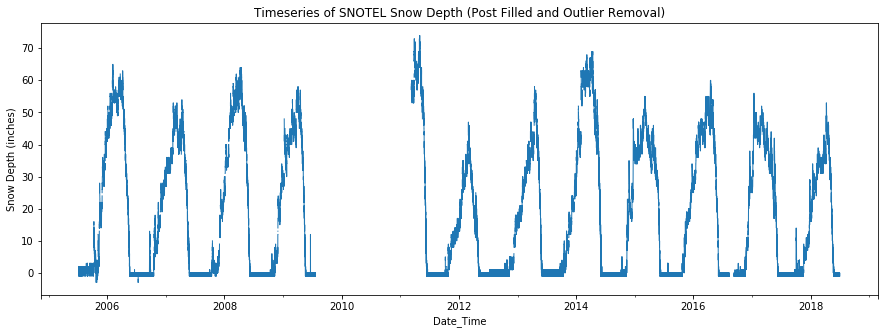

In [7]:
plt.figure(figsize=(15,5))

ax1 = snotel_df['SNWD.I-1 (in) '].plot(use_index=True, linewidth=1)
ax1.set_ylabel("Date")
ax1.set_ylabel("Snow Depth (inches)")
ax1.set_title("Timeseries of SNOTEL Snow Depth (Post Filled and Outlier Removal)")


----


## Determining Outliers Statistically (Temperature)

25.8


Text(0,0.5,'Temperature (deg C)')

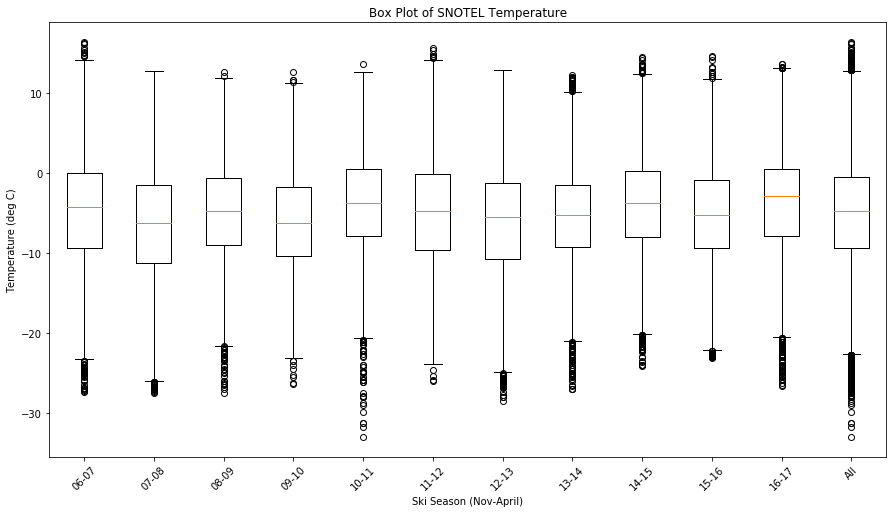

In [8]:

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_df['TOBS.I-1 (degC) '][~np.isnan(snotel_df['TOBS.I-1 (degC) '])]

merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]
print(filtered_data.max())
plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Temperature')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Temperature (deg C)')

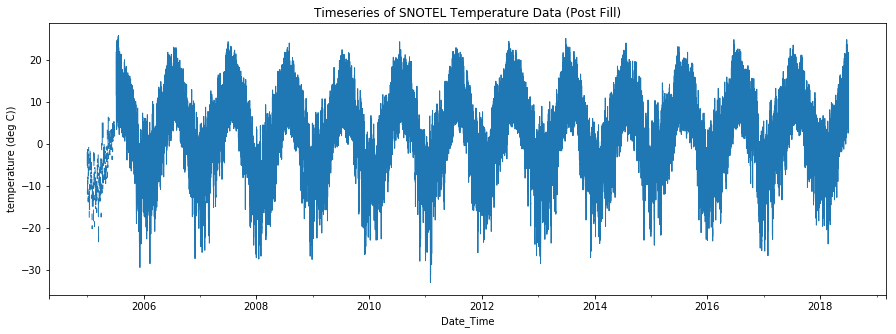

In [9]:
#years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

#for j in years:
plt.figure(figsize=(15,5))
    
ax1 = snotel_filled_df['TOBS.I-1 (degC) '].plot(use_index=True, linewidth=1)
ax1.set_ylabel("Date")
ax1.set_ylabel("temperature (deg C))")
ax1.set_title("Timeseries of SNOTEL Temperature Data (Post Fill)")
  
#ax2 = snotel_df['TOBS.I-1 (degC) '].plot(use_index=True, secondary_y = True, marker='.', markersize = 0.25)
#ax2.set_ylabel("Observed Temperature (deg C)", rotation = -90)
    
#Create legend
#h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, l1+l2, loc=2)
      
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')

plt.show()

----

----


## Is there a correlation between snowfall and wind speed?

**First calculate 12-snowfall column by finding difference between 12-hr snow depth observations**

In [13]:

#Now calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
snotel_filled_df['12hr_SNWD'] = snotel_filled_df['SNWD.I-1 (in) '].resample('12H').last()
snotel_filled_df['12hr-SNOWFALL'] = snotel_filled_df['12hr_SNWD']-snotel_filled_df['12hr_SNWD'].shift(+12)




In [14]:
asos_filled_df = asos_df.interpolate(limit=3)
asos_snotel_df = pd.merge(snotel_filled_df, asos_filled_df, on='Date_Time', how='outer')
print(asos_snotel_df.keys())


Index(['TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', '12hr_SNWD', '12hr-SNOWFALL',
       'Temperature_degC', 'Dewpoint_degC', 'Pressure_hp', 'WindDirection_deg',
       'WindSpeed_m/s', 'CloudCover', '1hr_Precipitation_mm',
       '6hr_Precipitation_mm'],
      dtype='object')


Date_Time
2005-07-08 12:00:00    3.0
2005-07-23 12:00:00    3.0
2005-07-29 12:00:00    3.0
2005-10-06 12:00:00    3.0
2005-10-07 12:00:00    3.0
Name: 12hr-SNOWFALL, dtype: float64
slope = 0.12204919177479193 )
intercept = 6.952495838488465
0.12204919177479193 6.952495838488465


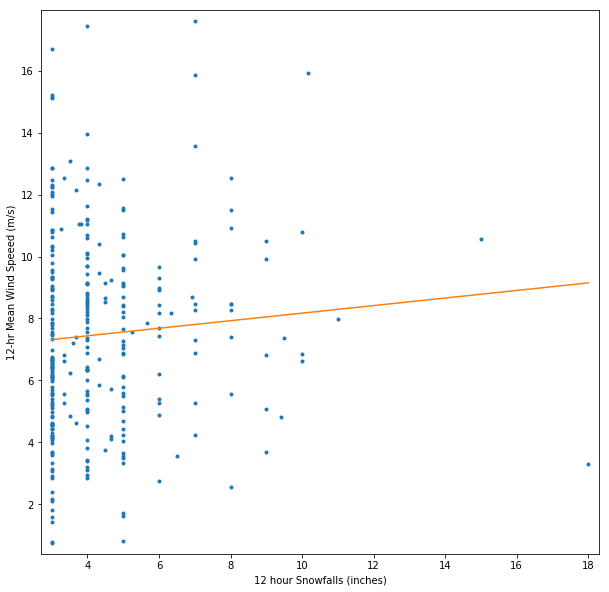

In [15]:
fig = plt.figure(figsize = (10,10))

yy = asos_snotel_df['12hr-SNOWFALL']>=3
snf_df = asos_snotel_df['12hr-SNOWFALL'][yy]

print(snf_df.head())

ws_df = asos_snotel_df['WindSpeed_m/s'].resample('12H').mean()

#print(ws_df, snf_df)

#snf_ws_df = pd.merge(sn, asos_filled_df, on='Date_Time', how='outer')

idx = np.isfinite(ws_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(snf_df[idx], ws_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('12 hour Snowfalls (inches)')
_ = plt.ylabel('12-hr Mean Wind Speeed (m/s)')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(snf_df[idx], ws_df[idx], 1)

# Print the results to the screen
print('slope =', a, ')')
print('intercept =', b)

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(snf_df[idx]),np.max(snf_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

----


## Is there a correlation between snowfall and cloud cover?

slope = 0.21794266619405134
intercept = 4.659933345783913
0.21794266619405134 4.659933345783913


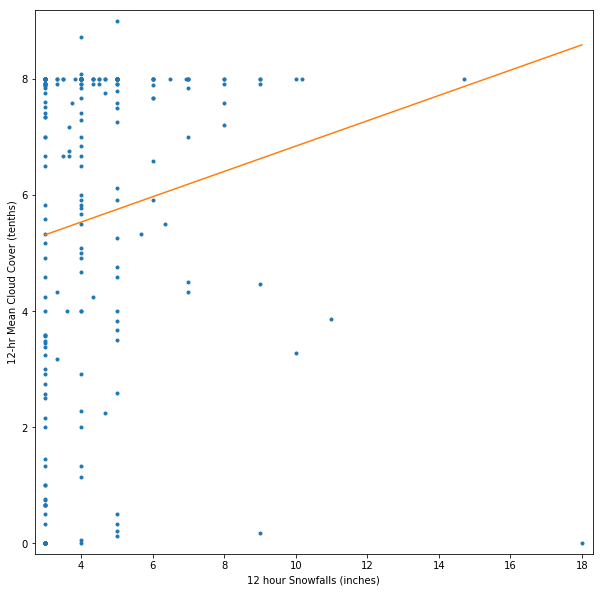

In [17]:
plt.figure(figsize=(10,10))


yy = asos_snotel_df['12hr-SNOWFALL']>=3
snf_df = asos_snotel_df['12hr-SNOWFALL'][yy]

cc_df = asos_snotel_df['CloudCover'].resample('12H').mean()



idx = np.isfinite(cc_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(snf_df[idx], cc_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('12 hour Snowfalls (inches)')
_ = plt.ylabel('12-hr Mean Cloud Cover (tenths)')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(snf_df[idx], cc_df[idx], 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(snf_df[idx]),np.max(snf_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

----


## Is there a correlation between snowfall and temperature?

slope = 0.0011708771802454749
intercept = -4.677069911089843


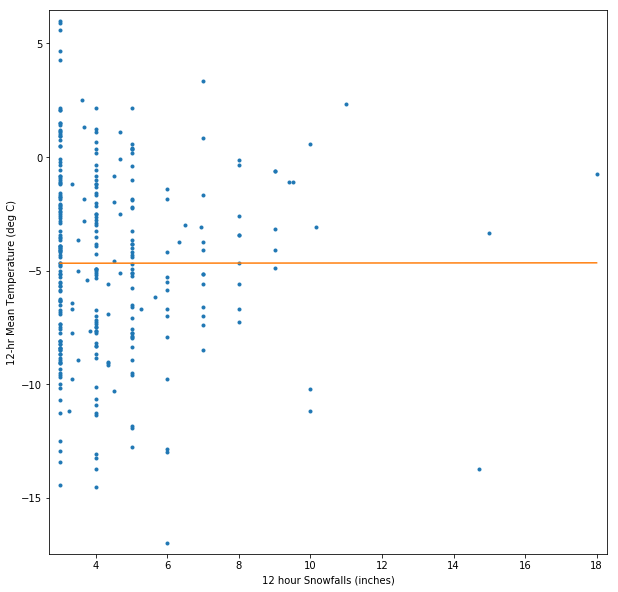

In [20]:
plt.figure(figsize=(10,10))



snf_df=asos_snotel_df['12hr-SNOWFALL']
snf_df[asos_snotel_df['12hr-SNOWFALL']<3] = np.NaN
temp_df = asos_snotel_df['Temperature_degC'].resample('12H').mean()



idx = np.isfinite(temp_df) & np.isfinite(snf_df)

# Plot the snowfall vs temperature
_ = plt.plot(snf_df[idx], temp_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('12 hour Snowfalls (inches)')
_ = plt.ylabel('12-hr Mean Temperature (deg C)')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(snf_df[idx], temp_df[idx], 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)


# Make theoretical line to plot
x = np.array([np.min(snf_df[idx]),np.max(snf_df[idx])])
y = a * x + b
_ = plt.plot(x, y)

----


## Is there a correlation between ASOS temperatures and SNOTEL temperatures?

slope = 0.780216966329904 children per woman / percent illiterate
intercept = 0.6235140258450055 children per woman
0.780216966329904 0.6235140258450055


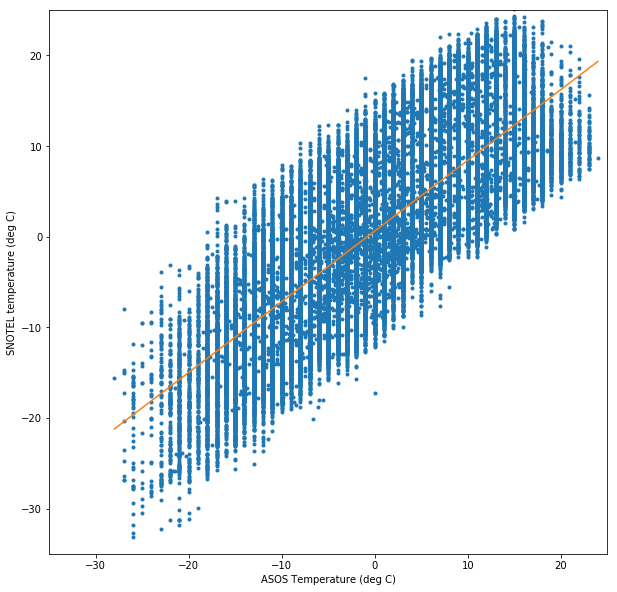

In [21]:
plt.figure(figsize=(10,10))

asos_temp_df=asos_snotel_df['Temperature_degC']
snotel_temp_df = asos_snotel_df['TOBS.I-1 (degC) ']



idx = np.isfinite(asos_temp_df) & np.isfinite(snotel_temp_df)

# Plot the snowfall vs temperature
_ = plt.plot(asos_temp_df[idx], snotel_temp_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('ASOS Temperature (deg C)')
_ = plt.ylabel('SNOTEL temperature (deg C)')
_ = plt.xlim([-35, 25])
_ = plt.ylim([-35, 25])


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(asos_temp_df[idx], snotel_temp_df[idx], 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(asos_temp_df[idx]),np.max(asos_temp_df[idx])])
y = a * x + b
_ = plt.plot(x, y)


## Exploring Wind Statistics

In [22]:
def showRoseWind(values, city_name, max_value):
    N = 8
    theta = np.arange( 0., 2 * np.pi, 2 * np.pi / N)
    radii = np.array(values)
    print(radii)
    plt.axes([ 0.025, 0.025, 0.95, 0.95], polar = True)
    colors = [( 1-x/max_value, 1-x/max_value, 0.75) for x in radii]
    plt.bar( theta, radii, width =( 2* np.pi/ N), bottom = 0.0, color = colors)
    plt.title( city_name, x = 0.2, fontsize = 20)

#Nelli, Fabio. Python Data Analytics: Data Analysis and Science using pandas, matplotlib and the Python Programming Language (Kindle Locations 6381-6386). Apress. Kindle Edition. 

[ 3904   454  1508  6097 14768 19659 27392  2788]
[ 3904   454  1508  6097 14768 19659 27392  2788]


c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


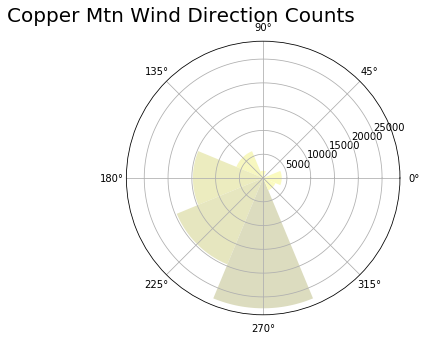

In [26]:
hist, bin = np.histogram(asos_snotel_df['WindDirection_deg'], 8,[ 0,360]) 
print(hist)
showRoseWind(hist, 'Copper Mtn Wind Direction Counts', 200000)

#Nelli, Fabio. Python Data Analytics: Data Analysis and Science using pandas, matplotlib and the Python Programming Language (Kindle Locations 6399-6401). Apress. Kindle Edition. 

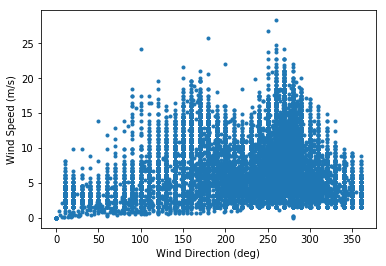

In [27]:
plt.plot(asos_snotel_df['WindDirection_deg'], asos_snotel_df['WindSpeed_m/s'], linestyle = 'none', marker = '.')
_ = plt.xlabel('Wind Direction (deg)')
_ = plt.ylabel('Wind Speed (m/s)')

In [ ]:
#WD = 360
#u_east = np.mean(np.sin(WD * np.pi/180))
#u_north = np.mean(np.cos(WD * np.pi/180))
#unit_WD = np.arctan2(u_east, u_north)
#unit_WD = (360 + unit_WD) % 360

#print(unit_WD)
from math import sin,cos,atan2,pi
import numpy as np
def meanangle(angles,weights=0,setting='degrees'):
    '''computes the mean angle'''
    if weights==0:
         weights=np.ones(len(angles))
    sumsin=0
    sumcos=0
    if setting=='degrees':
        angles=np.array(angles)*pi/180
    for i in range(len(angles)):
        sumsin+=weights[i]/sum(weights)*sin(angles[i])
        sumcos+=weights[i]/sum(weights)*cos(angles[i])
    average=atan2(sumsin,sumcos)
    if setting=='degrees':
        average=average*180/pi
    return average

print(meanangle([0,179]))

print(np.cos([0,45,90, 135, 180, 225, 270, 315, 360 ]))
